In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [11]:
import numpy as np

In [3]:
TCs = pd.read_csv('../input/cellPositions/TCPositions_sctintillator.csv', sep=' ')

In [98]:
TCs

,layer,triggercelleta,triggercellphi,triggercellieta,triggercelliphi
0,37.0,-1.709522,-3.119776,-9,144
1,37.0,-1.677480,-3.119776,-10,144
2,37.0,-1.634917,-3.119776,-11,144
3,37.0,-1.592443,-3.119776,-12,144
4,37.0,-1.550064,-3.119776,-13,144
...,...,...,...,...,...
29227,50.0,-1.668360,3.119776,-15,1
29228,50.0,-1.624724,3.119776,-16,1
29229,50.0,-1.581088,3.119776,-17,1
29230,50.0,-1.537451,3.119776,-18,1


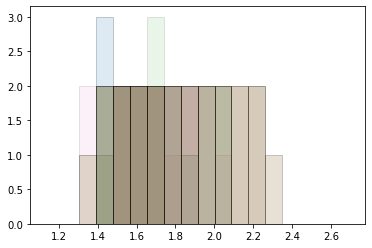

In [79]:
for j in range(37,51):
    (TCs['triggercelleta']*-1)[(TCs['layer']==j) & (TCs['triggercelliphi']==1)].hist(bins=[round(i*0.0870,5) for i in range(13,32)], histtype='bar',ec='black', alpha=0.1)
    plt.grid(None)

In [180]:
thresh ={
        37 : 1.57,
        38 : 1.58,
        39 : 1.59,
        40 : 1.60,
        41 : 1.79,
        42 :1.81,
        43 :1.83,
        44 : 1.85,
        45 : 1.86,
        46 : 1.88,
        47 : 1.90,
        48 : 1.92,
        49 : 1.93,
        50 :1.95
        }

In [182]:
eta_low = []
eta_high = []
eta_mid = []
for j in range(37,51):
    m = (TCs['triggercelleta']*-1)[(TCs['layer']==j) & (TCs['triggercelliphi']==1)]
    eta_low.append(pd.array(m)[-1] - (pd.array(m)[-2] - pd.array(m)[-1])/2)
    eta_high.append(pd.array(m)[0] + (pd.array(m)[0] - pd.array(m)[1])/2)
    for i in range(len(pd.array(m))):
        if pd.array(m)[i]<thresh[j]:
            eta_mid.append(0.5*(pd.array(m)[i]+pd.array(m)[i-1]))
            break

In [192]:
borders = pd.DataFrame({
    "layer": list(range(37,51)),
    "eta_low": eta_low,
    "eta_mid": eta_mid,
    "eta_high": eta_high,    
})

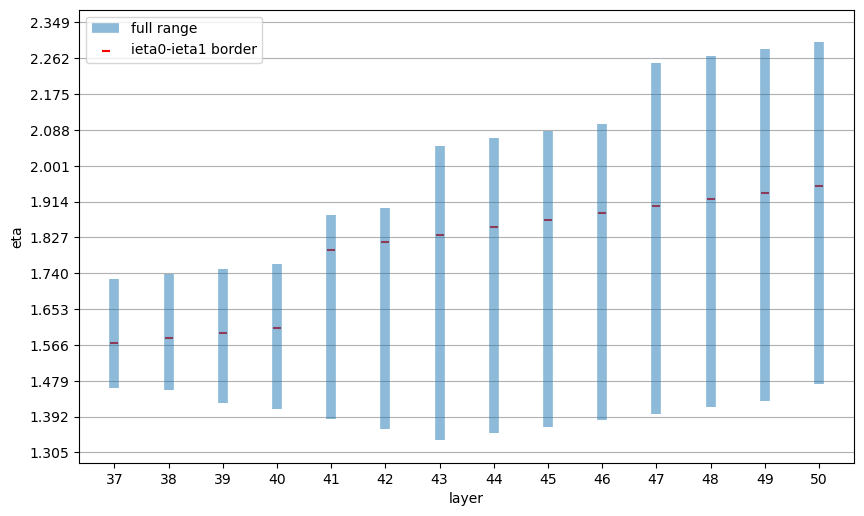

In [322]:
fig=plt.figure(figsize=(10,6), dpi= 100)
plt.vlines(borders['layer'], borders['eta_low'], borders['eta_high'], linestyle='-', lw=7, alpha =0.5, label = 'full range')
plt.scatter(borders['layer'], borders['eta_mid'], marker = "_", color='r', label = 'ieta0-ieta1 border')
ax = plt.gca()
ax.set_xticks(borders['layer'])
ax.set_yticks([i*0.0870 for i in range(15,28)])
ax.set_ylim([1.28,2.38])
ax.set_xlabel('layer')
ax.set_ylabel('eta')
ax.grid(axis='y')
ax.legend(loc=2)

In [323]:
2+2

4

In [167]:
m = (TCs['triggercelleta']*-1)[(TCs['layer']==42) & (TCs['triggercelliphi']==1)]


In [168]:
m

8051    1.878372
8052    1.836908
8053    1.793823
8054    1.750785
8055    1.707798
8056    1.664865
8057    1.621990
8058    1.579180
8059    1.536437
8060    1.493766
8061    1.451174
8062    1.408666
8063    1.376918
Name: triggercelleta, dtype: float64

In [126]:
1.493814 -0.021818499999999963

1.4719955

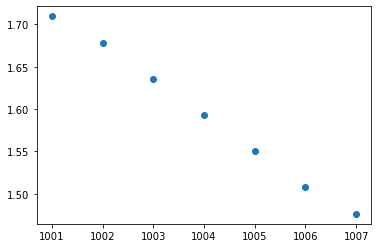

In [103]:
plt.scatter(m.index, m.values)

In [47]:
for i in range(15, 3):
    print(i, round(i*0.0870,5))

15 1.305
16 1.392
17 1.479
18 1.566
19 1.653
20 1.74
21 1.827
22 1.914
23 2.001
24 2.088
25 2.175
26 2.262
27 2.349
28 2.436
29 2.523
30 2.61
31 2.697


In [317]:
20*0.087

1.7399999999999998

In [346]:
a = np.array([1,3,4,2])

In [347]:
a

array([1, 3, 4, 2])

In [348]:
a = a.flatten()

In [349]:
a

array([1, 3, 4, 2])

In [350]:
a.sort()

In [351]:
a

array([1, 2, 3, 4])